# Nikita Kiran More(may 2024 Baner)

# Load the dataset 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df= pd.read_csv("Cardiotocographic.csv")

# Handle missing values appropriately (e.g., imputation, deletion).

In [11]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [12]:
print(df.isnull())

         LB     AC     FM     UC     DL     DS     DP   ASTV   MSTV   ALTV  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2121  False  False  False  False  False  False  False  False  False  False   
2122  False  False  False  False  False  False  False  False  False  False   
2123  False  False  False  False  False  False  False  False  False  False   
2124  False  False  False  False  False  False  False  False  False  False   
2125  False  False  False  False  False  False  False  False  False  False   

       MLTV  Width  Tendency    NSP  
0     False  False     Fa

In [13]:
print(df.isnull().sum())

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [14]:
df.isnull().sum().sum()

167

In [22]:
df['LB'].fillna(df['LB'].mean(),inplace=True)
df['AC'].fillna(df['AC'].mean(),inplace=True)
df['FM'].fillna(df['FM'].mean(),inplace=True)
df['UC'].fillna(df['UC'].mean(),inplace=True)
df['DL'].fillna(df['DL'].mean(),inplace=True)
df['DS'].fillna(df['DS'].mean(),inplace=True)
df['DP'].fillna(df['DP'].mean(),inplace=True)
df['ALTV'].fillna(df['ALTV'].mean(),inplace=True)
df['MLTV'].fillna(df['MLTV'].mean(),inplace=True)
df['Width'].fillna(df['Width'].mean(),inplace=True)
df['Tendency'].fillna(df['Tendency'].mean(),inplace=True)
df['NSP'].fillna(df['NSP'].mean(),inplace=True)

In [34]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [36]:
Q1 = df['LB'].quantile(0.25)
Q3 = df['LB'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
outliers = df[(df['LB'] < L) | (df['LB'] > U)]
print(outliers)

              LB        AC        FM        UC        DL        DS        DP  \
134    52.000000  0.001590  0.000000  0.029851  0.000000  0.000000  0.000003   
411   214.000000  0.000000  0.000000  0.001595  0.001595  0.000000  0.000000   
610   214.000000  0.002469  0.002469  0.002469  0.000000  0.000004  0.000000   
612   214.000000  0.005181  0.012953  0.002591  0.000000  0.000000  0.000000   
785    52.000000  0.000834  0.013344  0.000000  0.000000  0.000000  0.000000   
1027   51.842487  0.009485  0.000000  0.005420  0.002710  0.000005  0.000000   
1103  214.000000  0.006972  0.000000  0.002960  0.000000  0.000000  0.000000   
1406  214.000000  0.005068  0.000000  0.001689  0.000000  0.000000  0.000000   
1504  214.000000  0.006189  0.000000  0.006189  0.000000  0.000000  0.000000   
1834   52.188547  0.000000  0.001043  0.003128  0.007299  0.000000  0.000000   

           ASTV      MSTV  ALTV  MLTV      Width  Tendency     NSP  
134   58.000000  0.500000   0.0   7.9   44.00000  

In [32]:
Q1 = df['AC'].quantile(0.25)
Q3 = df['AC'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
outliers = df[(df['AC'] < L) | (df['AC'] > U)]
print(outliers)

              LB        AC        FM        UC        DL        DS        DP  \
8     122.000000  0.038567  0.000000  0.001517  0.000000  0.000000  0.000000   
23    128.000000 -0.019284  0.000000  0.000000  0.000000  0.000000  0.000000   
83    145.000000  0.014706  0.008403  0.002101  0.000000  0.000000  0.000000   
85    145.000000  0.014230  0.025873  0.001294  0.000000  0.000000  0.000000   
116   133.343598  0.038567  0.000000  0.006993  0.002331  0.000003  0.000175   
157   123.000000 -0.019284  0.000000  0.006400  0.000000  0.000000  0.000000   
181   138.000000  0.017241  0.000000  0.005305  0.000000  0.000000  0.000000   
496   130.000000  0.014178  0.091743  0.000938  0.000000  0.000000  0.000000   
497   130.000000  0.015552  0.083981  0.001555 -0.000026  0.000000  0.000000   
498   130.000000  0.015258  0.115023  0.000000  0.000000  0.000000  0.000000   
500   131.000000  0.014178  0.015013  0.000834  0.000000  0.000000  0.000000   
501   131.000000  0.014726  0.017403  0.

In [33]:
Q1 = df['DP'].quantile(0.25)
Q3 = df['DP'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
outliers = df[(df['DP'] < L) | (df['DP'] > U)]
print(outliers)

         LB        AC        FM        UC        DL            DS        DP  \
5     134.0  0.001116  0.000000  0.010493  0.009444  0.000000e+00  0.002099   
6     134.0  0.001403  0.000000  0.012623  0.008415  0.000000e+00  0.002805   
14    130.0  0.005838  0.407840  0.004170  0.005004  0.000000e+00  0.000826   
15    130.0  0.005571  0.380223  0.004178  0.004178  0.000000e+00  0.001393   
17    131.0  0.001524  0.382622  0.003049  0.004573  0.000000e+00  0.001524   
...     ...       ...       ...       ...       ...           ...       ...   
2073  130.0  0.007321  0.000732  0.000732  0.000000  0.000000e+00  0.000032   
2102  133.0 -0.000091  0.006031  0.007238  0.000000  0.000000e+00 -0.000026   
2110  136.0  0.000000  0.004110  0.008219  0.006849  0.000000e+00  0.001370   
2111  136.0  0.000000  0.001156  0.008696  0.008696  0.000000e+00  0.002174   
2112  136.0  0.000000  0.004823  0.006431  0.008039  9.488398e-07  0.001608   

      ASTV    MSTV      ALTV       MLTV  Width  Ten

In [37]:
Q1 = df['AC'].quantile(0.25)
Q3 = df['AC'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
outliers = df[(df['AC'] < L) | (df['AC'] > U)]
print(outliers)

              LB        AC        FM        UC        DL        DS        DP  \
8     122.000000  0.038567  0.000000  0.001517  0.000000  0.000000  0.000000   
23    128.000000 -0.019284  0.000000  0.000000  0.000000  0.000000  0.000000   
83    145.000000  0.014706  0.008403  0.002101  0.000000  0.000000  0.000000   
85    145.000000  0.014230  0.025873  0.001294  0.000000  0.000000  0.000000   
116   133.343598  0.038567  0.000000  0.006993  0.002331  0.000003  0.000175   
157   123.000000 -0.019284  0.000000  0.006400  0.000000  0.000000  0.000000   
181   138.000000  0.017241  0.000000  0.005305  0.000000  0.000000  0.000000   
496   130.000000  0.014178  0.091743  0.000938  0.000000  0.000000  0.000000   
497   130.000000  0.015552  0.083981  0.001555 -0.000026  0.000000  0.000000   
498   130.000000  0.015258  0.115023  0.000000  0.000000  0.000000  0.000000   
500   131.000000  0.014178  0.015013  0.000834  0.000000  0.000000  0.000000   
501   131.000000  0.014726  0.017403  0.

In [38]:
Q1 = df['DS'].quantile(0.25)
Q3 = df['DS'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
outliers = df[(df['DS'] < L) | (df['DS'] > U)]
print(outliers)

              LB        AC        FM        UC        DL            DS  \
33    120.000000  0.007506  0.102585  0.000800  0.000834 -1.790000e-06   
38    115.000000  0.006242  0.064919  0.003745  0.001248  3.667736e-06   
50    133.343598  0.003219  0.000000  0.008086  0.000000  2.508984e-06   
69    144.000000  0.000000  0.000000  0.004992  0.000000 -3.240000e-06   
84    145.000000  0.012712  0.029917  0.001412  0.000000  2.542969e-06   
...          ...       ...       ...       ...       ...           ...   
2061  127.000000  0.000000  0.000000  0.004575  0.000000  2.390162e-07   
2075  130.000000  0.007011  0.000876  0.000876  0.000000 -1.353180e-03   
2080  130.000000  0.003003  0.002002  0.001001  0.000000 -2.120000e-06   
2088  133.000000  0.000000  0.001236  0.006180  0.000000 -8.720000e-07   
2112  136.000000  0.000000  0.004823  0.006431  0.008039  9.488398e-07   

            DP  ASTV  MSTV  ALTV       MLTV      Width  Tendency       NSP  
33    0.000000  28.0   3.4   0.0  

In [39]:
Q1 = df['Width'].quantile(0.25)
Q3 = df['Width'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
outliers = df[(df['Width'] < L) | (df['Width'] > U)]
print(outliers)

              LB        AC        FM        UC        DL   DS        DP  ASTV  \
54    147.816574  0.000000  0.002502  0.000000 -0.000059  0.0  0.000000  70.0   
64    141.000000  0.001282  0.000000  0.005128  0.000000  0.0  0.000000  25.0   
120   123.000000  0.000000  0.000000  0.005004  0.004170  0.0  0.000000  47.0   
389   129.000000  0.008264  0.053719  0.002066  0.000000  0.0  0.000000  37.0   
704   130.030418  0.000000  0.352941  0.000000  0.000000  0.0  0.005348  80.0   
829   152.000000  0.000000  0.000000  0.003854  0.000963  0.0  0.000000  58.0   
860   142.000000  0.001471  0.001542  0.004412  0.000000  0.0  0.000000  39.0   
1096  123.000000  0.017341  0.000000  0.001927  0.000000  0.0  0.000000  24.0   
1273  115.000000  0.007032  0.000000  0.005626  0.000000  0.0  0.000000  20.0   
1320  128.000000  0.006519  0.007823  0.005215  0.005215  0.0  0.001304  19.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
54     0.3  69.000000   5.1 -174.0       1.0  3.004

In [40]:
Q1 = df['NSP'].quantile(0.25)
Q3 = df['NSP'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
outliers = df[(df['NSP'] < L) | (df['NSP'] > U)]
print(outliers)

         LB        AC        FM        UC        DL            DS        DP  \
0     120.0  0.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000   
5     134.0  0.001116  0.000000  0.010493  0.009444  0.000000e+00  0.002099   
6     134.0  0.001403  0.000000  0.012623  0.008415  0.000000e+00  0.002805   
7     122.0  0.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000   
8     122.0  0.038567  0.000000  0.001517  0.000000  0.000000e+00  0.000000   
...     ...       ...       ...       ...       ...           ...       ...   
2112  136.0  0.000000  0.004823  0.006431  0.008039  9.488398e-07  0.001608   
2121  140.0  0.000000  0.961268  0.007426  0.000000  0.000000e+00  0.000000   
2122  140.0  0.000775  0.000000  0.006979  0.000000  0.000000e+00  0.000000   
2123  140.0  0.000980  0.000000  0.006863  0.000000  0.000000e+00  0.000000   
2124  140.0  0.000679  0.000000  0.006110  0.000000  0.000000e+00  0.000000   

      ASTV  MSTV  ALTV       MLTV       Width  Tend

In [41]:
Q1 = df['Tendency'].quantile(0.25)
Q3 = df['Tendency'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
outliers = df[(df['Tendency'] < L) | (df['Tendency'] > U)]
print(outliers)

         LB        AC        FM        UC        DL            DS   DP  \
449   135.0  0.001233  0.002466  0.000000  0.000000  0.000000e+00  0.0   
692   133.0  0.007740  0.442724  0.004644  0.004644  0.000000e+00  0.0   
952   136.0  0.009506  0.000000  0.005703  0.002852  0.000000e+00  0.0   
1039  125.0  0.000000  0.000000  0.005217  0.000000  0.000000e+00  0.0   
1098  122.0  0.000000 -0.000064  0.002516  0.000067  0.000000e+00  0.0   
1318  125.0  0.002062  0.014433  0.006186  0.008247  0.000000e+00  0.0   
1392  142.0  0.000000  0.000000  0.007463  0.000000  0.000000e+00  0.0   
1595  134.0  0.000000  0.000000  0.005181  0.007772  0.000000e+00  0.0   
1856  138.0  0.013713  0.000000  0.004219  0.000000  0.000000e+00  0.0   
2088  133.0  0.000000  0.001236  0.006180  0.000000 -8.720000e-07  0.0   

           ASTV  MSTV  ALTV       MLTV       Width  Tendency  NSP  
449   58.000000   0.6  15.0   8.000000   95.000000 -3.000000  1.0  
692   24.000000  -6.6   0.0  13.400000  124.99435

In [42]:
Q1 = df['FM'].quantile(0.25)
Q3 = df['FM'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
outliers = df[(df['FM'] < L) | (df['FM'] > U)]
print(outliers)

         LB        AC        FM        UC        DL   DS        DP  ASTV  \
12    131.0  0.005076  0.072335  0.007614  0.002538  0.0  0.000000  28.0   
13    131.0  0.009077  0.222390  0.006051  0.001513  0.0  0.000000  28.0   
14    130.0  0.005838  0.407840  0.004170  0.005004  0.0  0.000826  21.0   
15    130.0  0.005571  0.380223  0.004178  0.004178  0.0  0.001393  19.0   
16    130.0  0.006088  0.441400  0.004566  0.004566  0.0  0.000000  24.0   
...     ...       ...       ...       ...       ...  ...       ...   ...   
2083  130.0  0.000000  0.008861  0.007595  0.000000  0.0  0.000000  73.0   
2099  133.0  0.000000  0.008653  0.004944  0.000000  0.0  0.000000  72.0   
2100  133.0  0.000000  0.009840  0.004920  0.000000  0.0  0.000000  70.0   
2101  133.0  0.000000  0.009357  0.008187  0.000000  0.0  0.000000  69.0   
2121  140.0  0.000000  0.961268  0.007426  0.000000  0.0  0.000000  79.0   

        MSTV       ALTV  MLTV  Width  Tendency  NSP  
12    1.4000  -0.702936  12.9   6

In [43]:
Q1 = df['UC'].quantile(0.25)
Q3 = df['UC'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
outliers = df[(df['UC'] < L) | (df['UC'] > U)]
print(outliers)

              LB        AC       FM        UC        DL   DS        DP  ASTV  \
134    52.000000  0.001590  0.00000  0.029851  0.000000  0.0  0.000003  58.0   
543   140.000000  0.000029  0.00000  0.029851  0.000000  0.0  0.000000  53.0   
793   146.000000  0.000388  0.00000 -0.014925  0.001940  0.0  0.000000  52.0   
917   121.851326  0.000000  0.00000  0.029851  0.000000  0.0  0.001706  33.0   
1164  131.000000  0.010661  0.00000  0.014925  0.000000  0.0  0.000000  26.0   
1396  142.000000  0.000872  0.00000 -0.014925  0.004359  0.0  0.000000  49.0   
1469  148.000000  0.003633  0.00000 -0.014925  0.000000  0.0  0.000000  36.0   
1593  134.000000  0.000000  0.00000  0.029936  0.008086  0.0  0.000000  20.0   
1671  110.000000  0.003799  0.00076  0.029851  0.000760  0.0 -0.000017  65.0   
1717  131.000000  0.009857  0.00000  0.030002  0.000896  0.0  0.000000  54.0   
1868  138.000000  0.007143  0.00000 -0.014925  0.003571  0.0  0.000000  49.0   
1902  130.000000  0.005941  0.00000  0.0

In [44]:
Q1 = df['DL'].quantile(0.25)
Q3 = df['DL'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
outliers = df[(df['DL'] < L) | (df['DL'] > U)]
print(outliers)

         LB        AC        FM        UC        DL   DS        DP       ASTV  \
5     134.0  0.001116  0.000000  0.010493  0.009444  0.0  0.002099  26.000000   
6     134.0  0.001403  0.000000  0.012623  0.008415  0.0  0.002805  29.000000   
28    132.0 -0.000040  0.135113  0.000834  0.008340  0.0  0.000834  29.000000   
29    132.0  0.000000  0.098784  0.000000  0.012158  0.0  0.000000  26.000000   
30    132.0  0.000000  0.107590  0.001702  0.010008  0.0  0.000000  26.487809   
...     ...       ...       ...       ...       ...  ...       ...        ...   
2045  128.0  0.000000  0.006222  0.008889  0.009778  0.0  0.000000  63.000000   
2046  128.0  0.000000  0.006604  0.008491  0.009434  0.0  0.000000  63.000000   
2047  128.0  0.000000  0.007675  0.006579  0.009868  0.0  0.000000  63.000000   
2048  128.0  0.000000  0.000000  0.008032  0.010040  0.0  0.000000  63.000000   
2111  136.0  0.000000  0.001156  0.008696  0.008696  0.0  0.002174  63.000000   

      MSTV  ALTV  MLTV  Wid

In [45]:
Q1 = df['ASTV'].quantile(0.25)
Q3 = df['ASTV'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
outliers = df[(df['ASTV'] < L) | (df['ASTV'] > U)]
print(outliers)

              LB        AC        FM        UC        DL        DS   DP  \
131   158.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0   
232   123.000000  0.003650  0.005474  0.000000  0.000000  0.000000  0.0   
345   139.000000 -0.000007  0.006593  0.000000  0.000000  0.000000  0.0   
504   128.000000  0.008253  0.013755  0.004127  0.000000  0.000000  0.0   
1014  139.000000  0.006312  0.000000  0.004509  0.000000  0.000000  0.0   
1027   51.842487  0.009485  0.000000  0.005420  0.002710  0.000005  0.0   
1195  138.000000  0.011752  0.000000  0.005342  0.000000  0.000000  0.0   
1578  132.000000  0.000000 -0.002889  0.002994  0.000074  0.000000  0.0   
1941  133.000000  0.000000  0.003562  0.006233  0.003562  0.000000  0.0   
2008  125.000000  0.001196  0.001196  0.008373  0.009569  0.000000  0.0   

       ASTV  MSTV  ALTV       MLTV       Width  Tendency      NSP  
131   -63.0   0.6  31.0   8.600000   92.000000       1.0  1.00000  
232   162.0   0.7   0.0   8.600000   7

In [46]:
Q1 = df['MSTV'].quantile(0.25)
Q3 = df['MSTV'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
outliers = df[(df['MSTV'] < L) | (df['MSTV'] > U)]
print(outliers)

         LB        AC        FM        UC        DL   DS        DP       ASTV  \
5     134.0  0.001116  0.000000  0.010493  0.009444  0.0  0.002099  26.000000   
6     134.0  0.001403  0.000000  0.012623  0.008415  0.0  0.002805  29.000000   
28    132.0 -0.000040  0.135113  0.000834  0.008340  0.0  0.000834  29.000000   
29    132.0  0.000000  0.098784  0.000000  0.012158  0.0  0.000000  26.000000   
30    132.0  0.000000  0.107590  0.001702  0.010008  0.0  0.000000  26.487809   
...     ...       ...       ...       ...       ...  ...       ...        ...   
2024  129.0  0.000000  0.001669  0.005008  0.013454  0.0  0.000000  58.000000   
2034  129.0  0.000000  0.001073  0.006438  0.005365  0.0  0.002146  67.000000   
2048  128.0  0.000000  0.000000  0.008032  0.010040  0.0  0.000000  63.000000   
2049  125.0  0.004768  0.015495  0.007151  0.000000  0.0  0.000000  66.000000   
2051  127.0  0.002587  0.016818  0.005283  0.000000  0.0  0.000000  66.000000   

      MSTV      ALTV       

In [48]:
Q1 = df['ALTV'].quantile(0.25)
Q3 = df['ALTV'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
outliers = df[(df['ALTV'] < L) | (df['ALTV'] > U)]
print(outliers)

         LB        AC        FM        UC        DL   DS   DP  ASTV      MSTV  \
0     120.0  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0  0.500000   
24    128.0  0.000000  0.000000  0.003311  0.000091  0.0  0.0  86.0  0.305801   
25    124.0  0.000000  0.000000  0.000000 -0.000035  0.0  0.0  86.0  0.300000   
27    124.0  0.000000  0.000000  0.000000  0.000000  0.0  0.0  87.0  0.200000   
53    150.0  0.000000  0.000834  0.000000  0.000834  0.0  0.0  61.0  0.500000   
...     ...       ...       ...       ...       ...  ...  ...   ...       ...   
2106  136.0  0.000000  0.001096  0.007675  0.000000  0.0  0.0  78.0  0.400000   
2114  137.0  0.000000  0.000000  0.007009  0.000000  0.0  0.0  81.0  0.359472   
2115  140.0  0.000021  0.000000  0.006424  0.000000  0.0  0.0  83.0  0.200000   
2116  140.0  0.003968  0.000000  0.003968  0.000000  0.0  0.0  80.0  0.200000   
2125  142.0  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0  0.400000   

           ALTV  MLTV  Widt

In [49]:
Q1 = df['MLTV'].quantile(0.25)
Q3 = df['MLTV'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
outliers = df[(df['MLTV'] < L) | (df['MLTV'] > U)]
print(outliers)

         LB        AC        FM        UC        DL        DS        DP  ASTV  \
3     134.0  0.002561  0.000000  0.007742  0.002561  0.000000  0.000000  16.0   
10    151.0  0.000000  0.000000  0.000834  0.000834  0.000000  0.000000  64.0   
11    150.0  0.000000  0.000000  0.001014  0.000983  0.000000  0.000000  64.0   
33    120.0  0.007506  0.102585  0.000800  0.000834 -0.000002  0.000000  28.0   
35    120.0  0.006061  0.109091  0.007273  0.000000  0.000000  0.000000  27.0   
...     ...       ...       ...       ...       ...       ...       ...   ...   
1750  134.0  0.004800  0.001600  0.001600  0.003200  0.000000  0.003200  62.0   
1800  143.0  0.000000  0.000000  0.003717  0.000000 -0.000004  0.000000  66.0   
1818  139.0  0.011139  0.001007  0.007049  0.000000  0.000003  0.000000  53.0   
1882  139.0  0.001835  0.000000  0.006422  0.000000  0.000000  0.000000  58.0   
2033  129.0  0.000000  0.001122  0.006734  0.005767  0.000004  0.002245  67.0   

      MSTV  ALTV   MLTV  Wi

# 2.	Statistical Summary:

In [50]:
summary = df.describe()

In [51]:
summary

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.214328,0.004370,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734356,42.719161,0.642424,0.641426
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [71]:
median_V = df.median()
mean_V =df.mean()

In [55]:
df.median()

LB          133.000000
AC            0.001668
FM            0.000000
UC            0.004484
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.500000
Width        68.000000
Tendency      0.000000
NSP           1.000000
dtype: float64

In [66]:
df.mean()

LB          133.343598
AC            0.003219
FM            0.009894
UC            0.004391
DL            0.001895
DS            0.000003
DP            0.000175
ASTV         46.995984
MSTV          1.364378
ALTV         10.285964
MLTV          8.284887
Width        70.429260
Tendency      0.316371
NSP           1.304507
dtype: float64

In [67]:
summary['std']=df.std()
summary['IQR'] = df.quantile(0.75) - df.quantile(0.25)

In [59]:
print(summary)

                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.214328     0.004370     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63

In [60]:
summary=df.describe()

In [73]:
std_V = df.std()
iqr_V = df.quantile(0.75) - df.quantile(0.25)


In [62]:
print(summary)

                 LB           AC           FM           UC           DL  \
count   2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean     133.343598     0.003219     0.009894     0.004391     0.001895   
std       11.214328     0.004370     0.067540     0.003340     0.003343   
min       51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%      126.000000     0.000000     0.000000     0.001851     0.000000   
50%      133.000000     0.001668     0.000000     0.004484     0.000000   
75%      140.000000     0.005606     0.002567     0.006536     0.003289   
max      214.000000     0.038567     0.961268     0.030002     0.030769   
median   133.000000     0.001668     0.000000     0.004484     0.000000   
IQR       14.000000     0.005606     0.002567     0.004685     0.003289   

                 DS           DP         ASTV         MSTV         ALTV  \
count   2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean       0.000003     

In [72]:
print("Means:\n",mean_V)
print("Medians:\n", median_V)


Means:
 LB          133.343598
AC            0.003219
FM            0.009894
UC            0.004391
DL            0.001895
DS            0.000003
DP            0.000175
ASTV         46.995984
MSTV          1.364378
ALTV         10.285964
MLTV          8.284887
Width        70.429260
Tendency      0.316371
NSP           1.304507
dtype: float64
Medians:
 LB          133.000000
AC            0.001668
FM            0.000000
UC            0.004484
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.500000
Width        68.000000
Tendency      0.000000
NSP           1.000000
dtype: float64


In [104]:
print("Standard Deviations:\n", std_V)
print("Interquartile Ranges:\n", iqr_V)

Standard Deviations:
 LB          11.214328
AC           0.004370
FM           0.067540
UC           0.003340
DL           0.003343
DS           0.000141
DP           0.000836
ASTV        18.813973
MSTV         1.173632
ALTV        21.205041
MLTV         7.734356
Width       42.719161
Tendency     0.642424
NSP          0.641426
dtype: float64
Interquartile Ranges:
 LB          14.000000
AC           0.005606
FM           0.002567
UC           0.004685
DL           0.003289
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.200000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64


# 3.	Data Visualization:

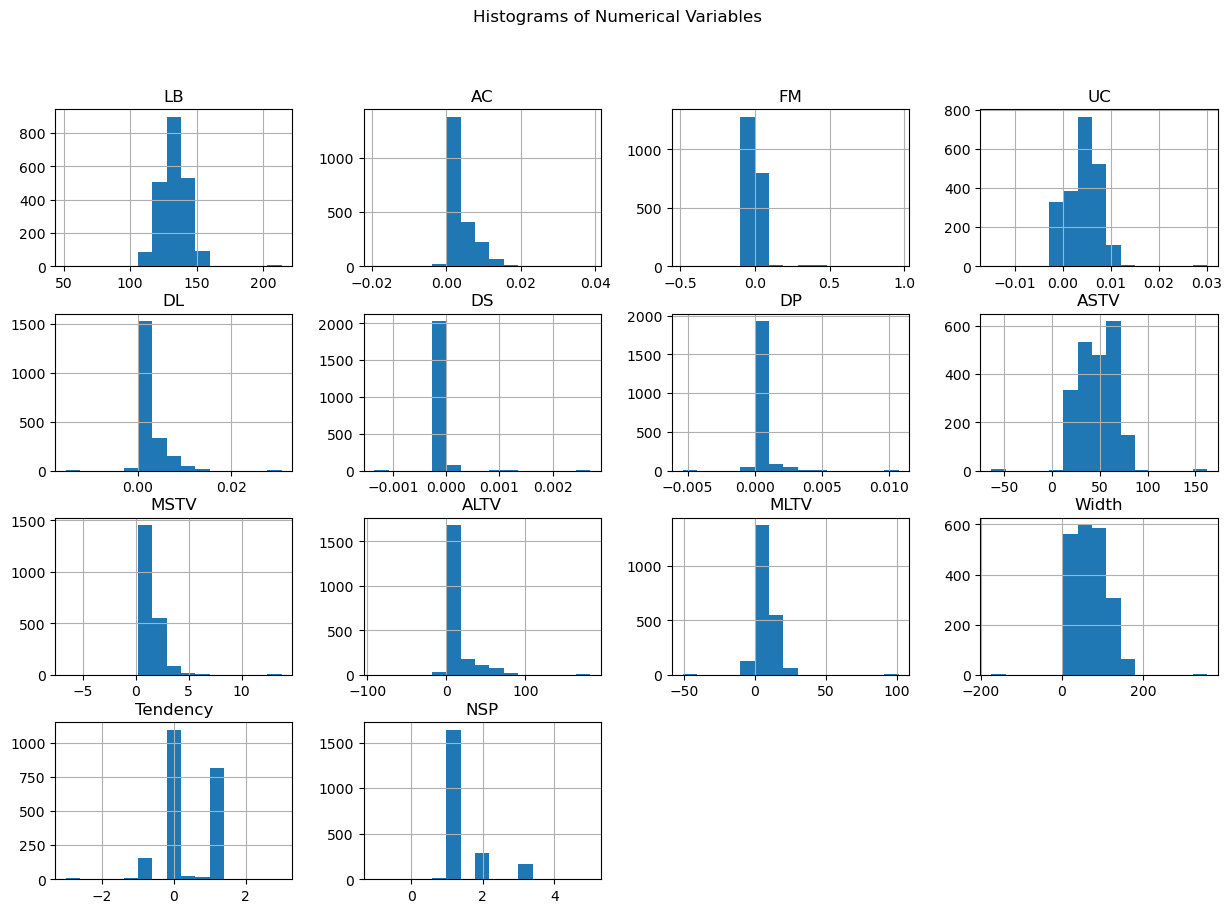

In [75]:
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

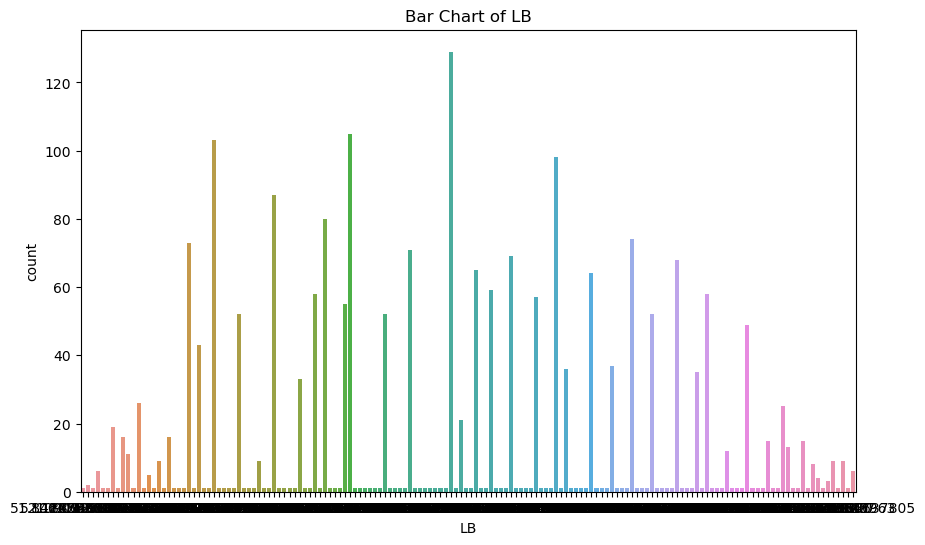

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(x='LB', data=df)
plt.title('Bar Chart of LB')
plt.show()

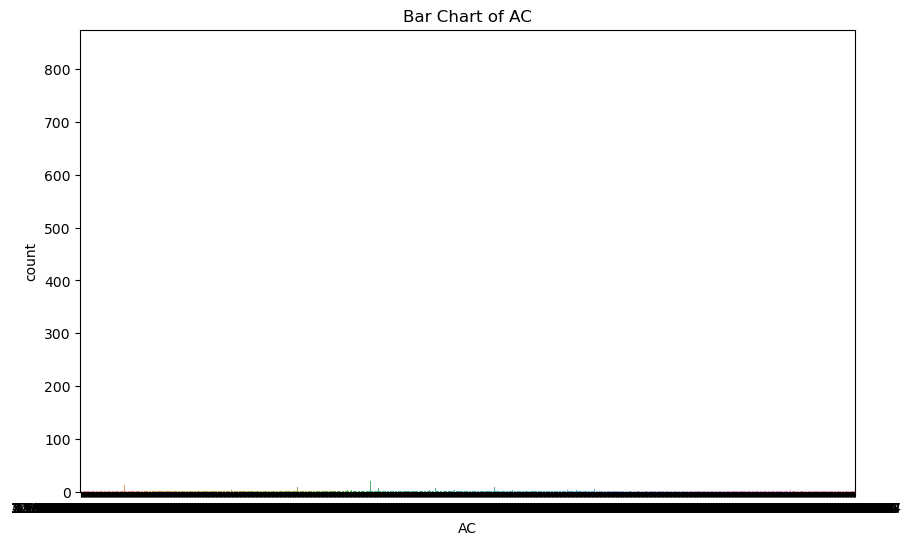

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AC', data=df)
plt.title('Bar Chart of AC')
plt.show()

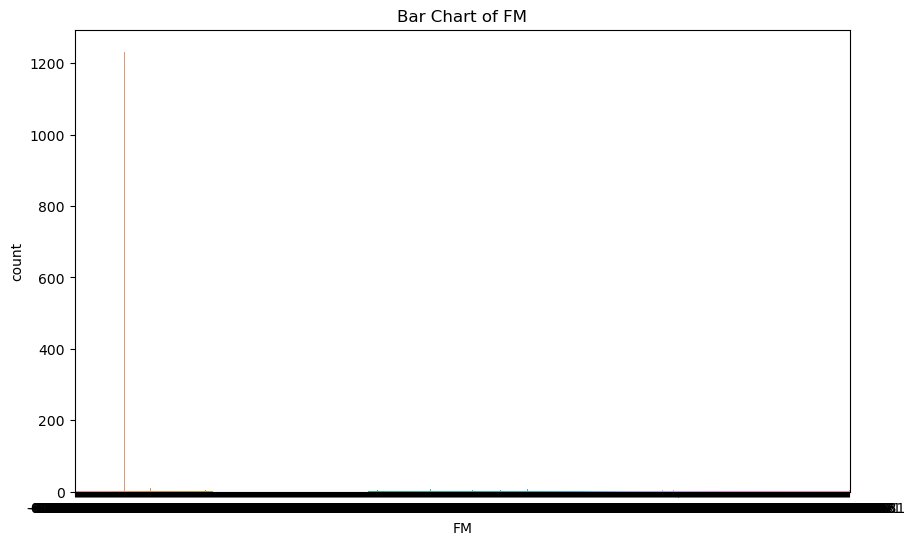

In [79]:
plt.figure(figsize=(10, 6))
sns.countplot(x='FM', data=df)
plt.title('Bar Chart of FM')
plt.show()

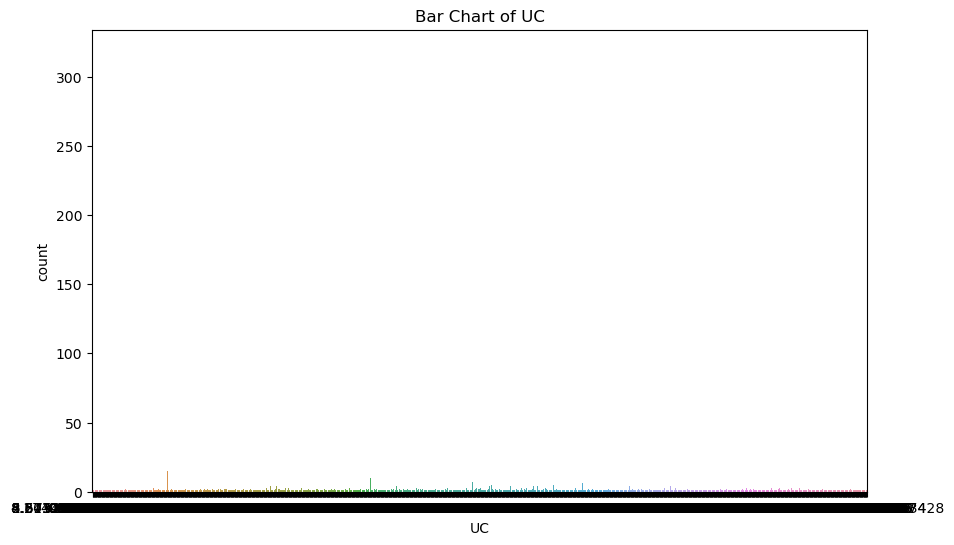

In [80]:
plt.figure(figsize=(10, 6))
sns.countplot(x='UC', data=df)
plt.title('Bar Chart of UC')
plt.show()

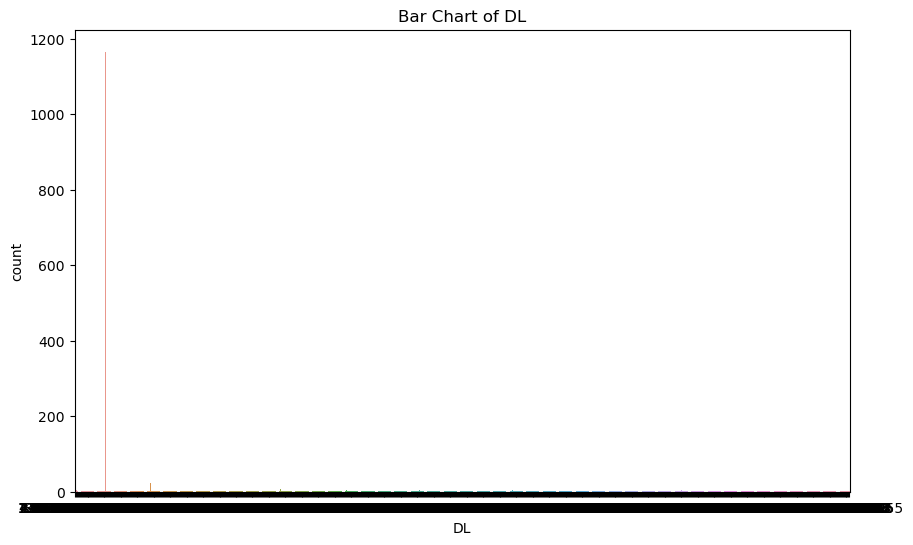

In [81]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DL', data=df)
plt.title('Bar Chart of DL')
plt.show()

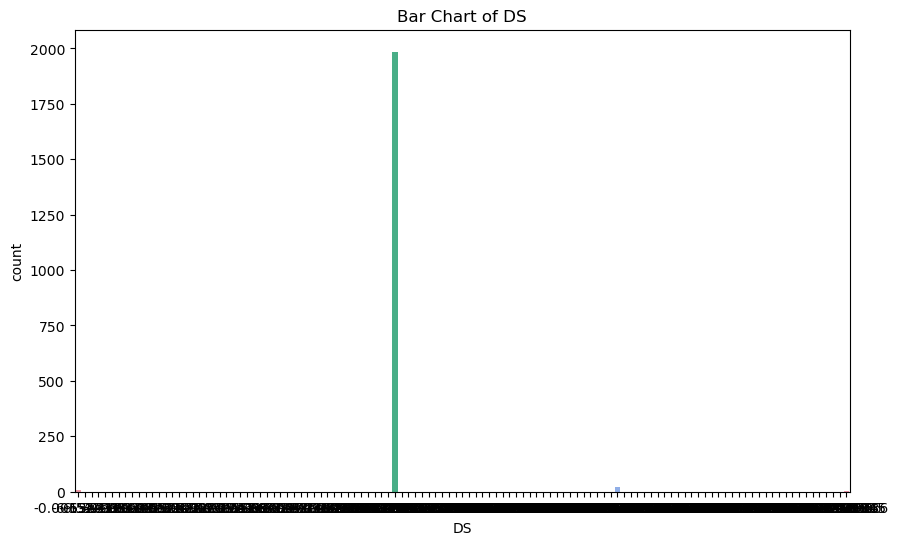

In [82]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DS', data=df)
plt.title('Bar Chart of DS')
plt.show()

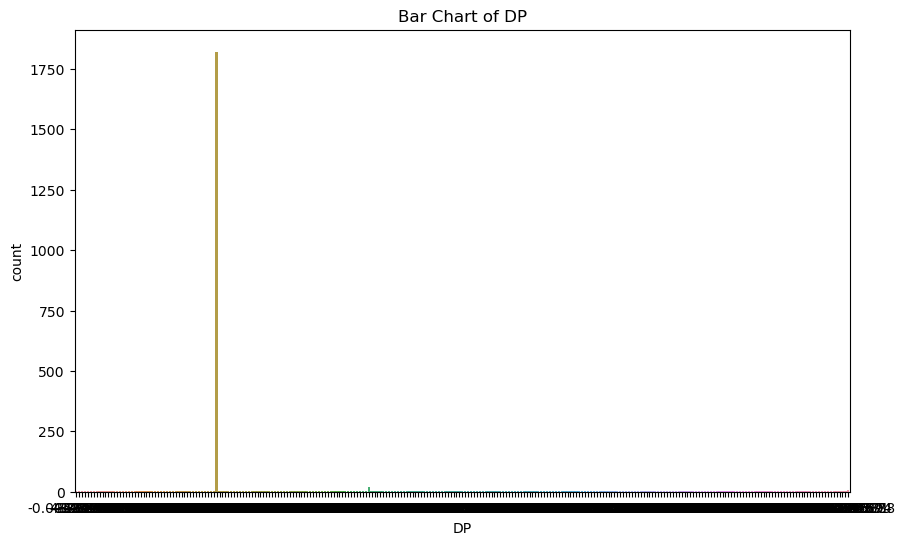

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DP', data=df)
plt.title('Bar Chart of DP')
plt.show()

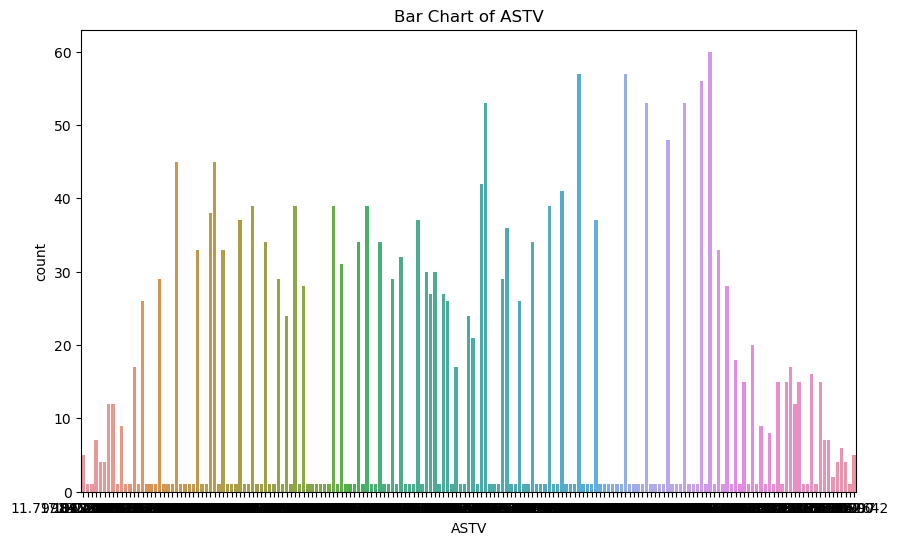

In [84]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ASTV', data=df)
plt.title('Bar Chart of ASTV')
plt.show()

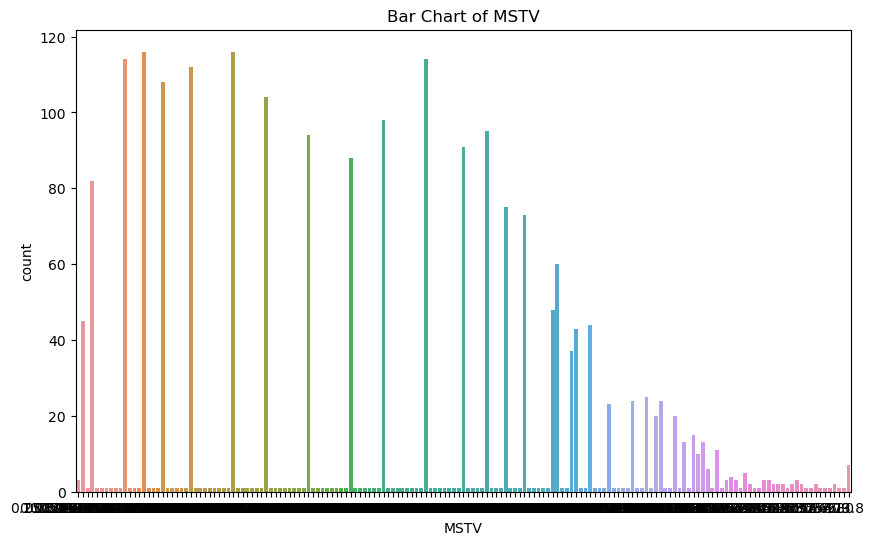

In [85]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MSTV', data=df)
plt.title('Bar Chart of MSTV')
plt.show()

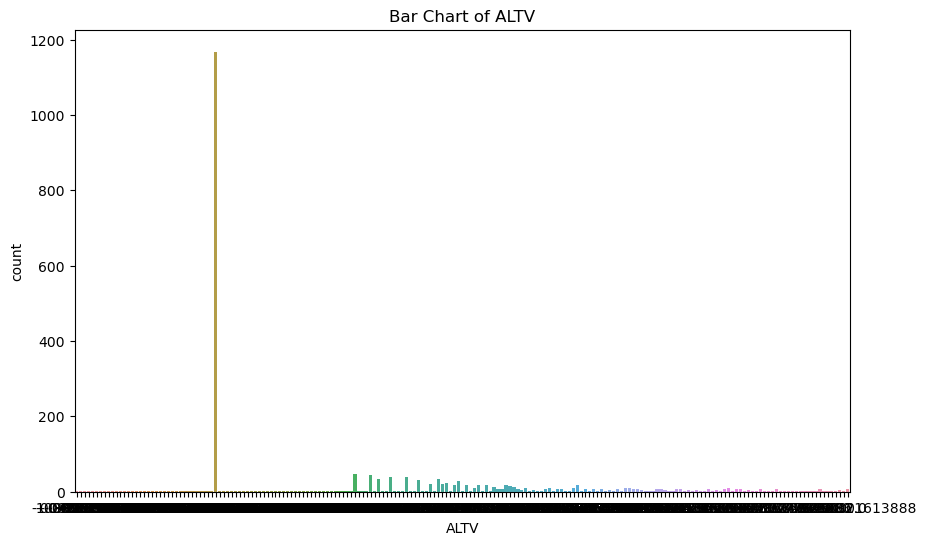

In [86]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ALTV', data=df)
plt.title('Bar Chart of ALTV')
plt.show()

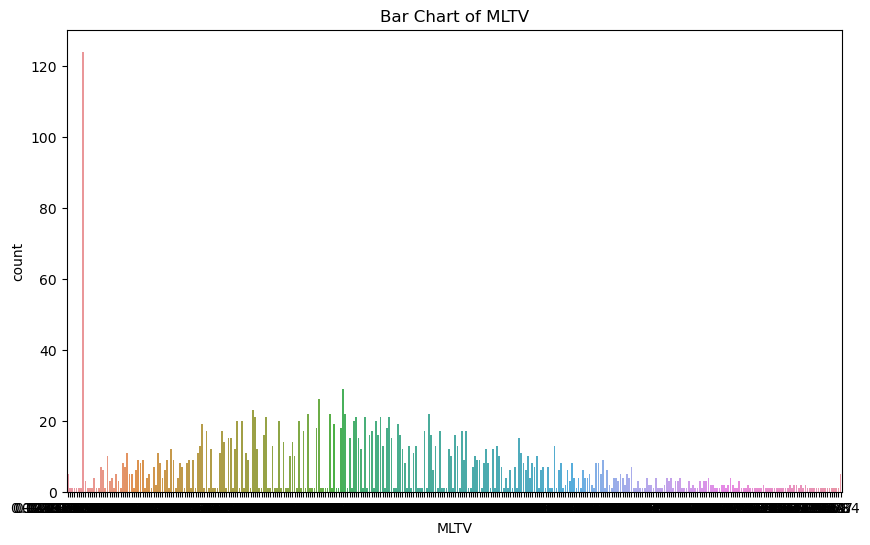

In [87]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MLTV', data=df)
plt.title('Bar Chart of MLTV')
plt.show()

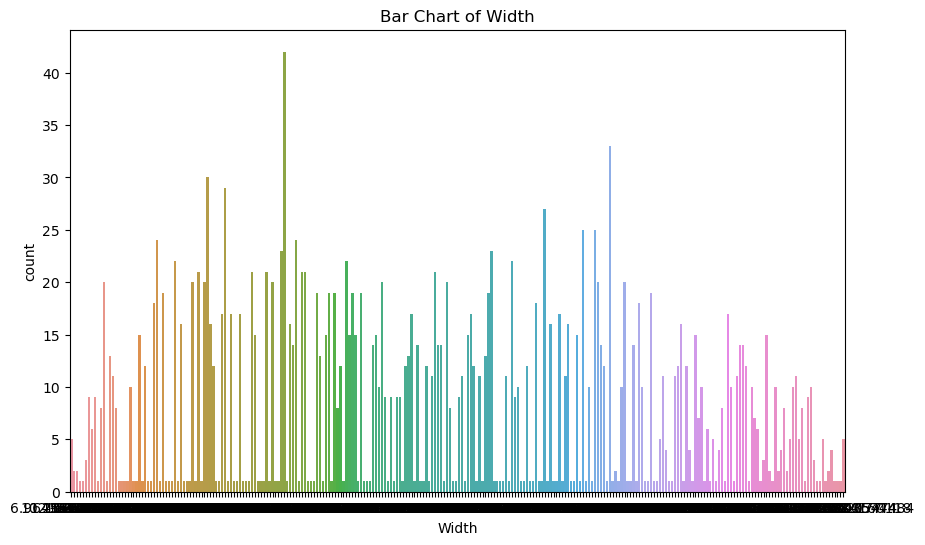

In [88]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Width', data=df)
plt.title('Bar Chart of Width')
plt.show()

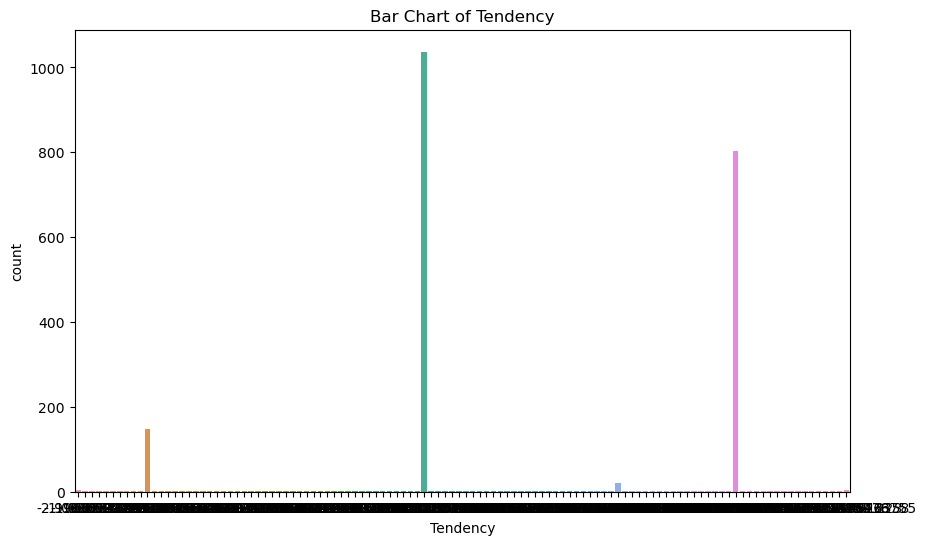

In [89]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Tendency', data=df)
plt.title('Bar Chart of Tendency')
plt.show()

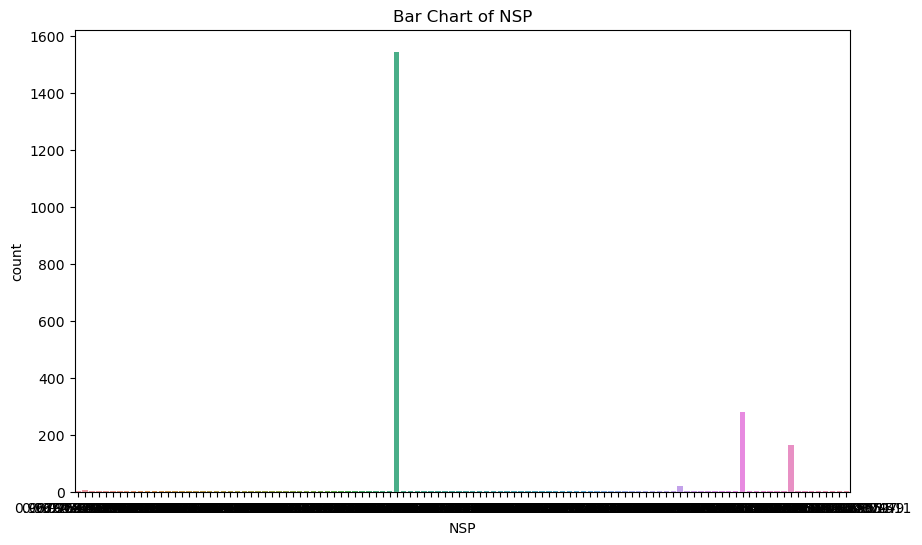

In [90]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NSP', data=df)
plt.title('Bar Chart of NSP')
plt.show()

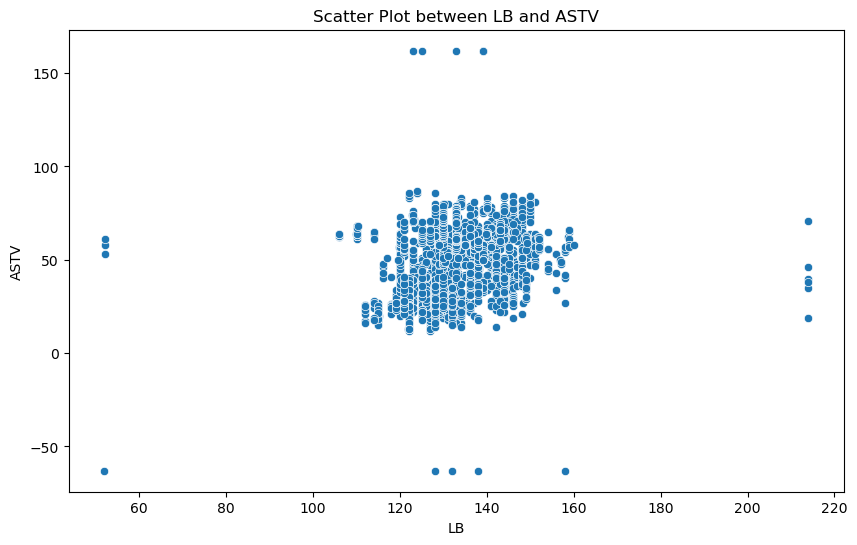

In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LB', y='ASTV', data=df)
plt.title('Scatter Plot between LB and ASTV')
plt.show()

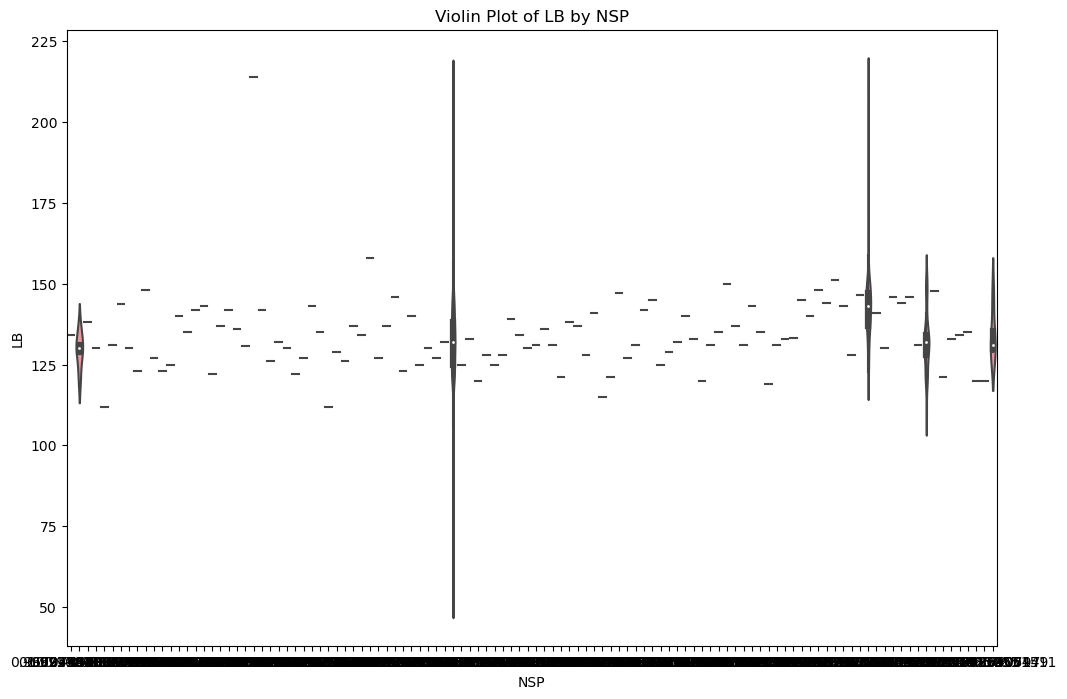

In [93]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='NSP', y='LB', data=df)
plt.title('Violin Plot of LB by NSP')
plt.show()

# 4. Pattern Recognition and Insights

In [94]:
correlation = df.corr()

In [95]:
print(correlation)

                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.062839  0.018776 -0.166201 -0.126536 -0.005438   
AC       -0.062839  1.000000  0.009432  0.071863 -0.093196 -0.033101   
FM        0.018776  0.009432  1.000000 -0.053226  0.009718  0.029899   
UC       -0.166201  0.071863 -0.053226  1.000000  0.190128 -0.006922   
DL       -0.126536 -0.093196  0.009718  0.190128  1.000000  0.058430   
DS       -0.005438 -0.033101  0.029899 -0.006922  0.058430  1.000000   
DP       -0.047724 -0.083277  0.121274  0.070501  0.144940  0.004285   
ASTV      0.241857 -0.230439 -0.032691 -0.181161 -0.069361  0.008425   
MSTV     -0.169561  0.133649  0.017055  0.189406  0.410102  0.016077   
ALTV      0.210446 -0.271041 -0.011936 -0.227304 -0.186967 -0.004392   
MLTV     -0.003457 -0.104875 -0.006237 -0.049351 -0.165198  0.034349   
Width    -0.118425  0.234735  0.097204  0.107159  0.408664  0.040832   
Tendency  0.236864  0.031977 -0.018338 -0.066463 -0.023490 -0.01

In [99]:
significant_corr = correlation[(correlation > 0.5) | (correlation< -0.5)]
print(significant_corr)

           LB   AC   FM   UC   DL   DS   DP  ASTV  MSTV  ALTV  MLTV  Width  \
LB        1.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
AC        NaN  1.0  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
FM        NaN  NaN  1.0  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
UC        NaN  NaN  NaN  1.0  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
DL        NaN  NaN  NaN  NaN  1.0  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
DS        NaN  NaN  NaN  NaN  NaN  1.0  NaN   NaN   NaN   NaN   NaN    NaN   
DP        NaN  NaN  NaN  NaN  NaN  NaN  1.0   NaN   NaN   NaN   NaN    NaN   
ASTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   1.0   NaN   NaN   NaN    NaN   
MSTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   1.0   NaN   NaN    NaN   
ALTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   1.0   NaN    NaN   
MLTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   1.0    NaN   
Width     NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   

# Conclusion